In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
image = plt.imread("donut.jpg")[50:350,200:450,:]

In [63]:
image.shape

(300, 250, 3)

In [64]:
def rgb2YCbCr(tensor):
    H, W = tensor.shape[:2]
    YCbCr = np.zeros((H,W,3))
    for i in range(H):
        for j in range(W):
            YCbCr[i,j,0] =    0.299*tensor[i,j,0]  + 0.587*tensor[i,j,1]  + 0.144*tensor[i,j,2]
            YCbCr[i,j,1] = - 0.1687*tensor[i,j,0] - 0.3313*tensor[i,j,1]    + 0.5*tensor[i,j,2] + 128
            YCbCr[i,j,2] =      0.5*tensor[i,j,0] - 0.4187*tensor[i,j,1] - 0.0813*tensor[i,j,2] + 128
    return YCbCr

In [65]:
YCbCr = rgb2YCbCr(image)
Y = YCbCr[:,:,0]

In [66]:
H,W = Y.shape[:2]
factor = 5
Pooled_Y = np.zeros((H,W))
for row in range(0,H,factor):
    for column in range(0,W,factor):
        sum = 0
        for i in range(factor):
            for j in range(factor):
                if(i+row<H and column+j<W):
                    sum+=Y[row+i,column+j]
        sum = sum / (factor*factor)
        for i in range(factor):
            for j in range(factor):
                if(i+row<H and column+j<W):
                    Pooled_Y[row+i,column+j] = sum

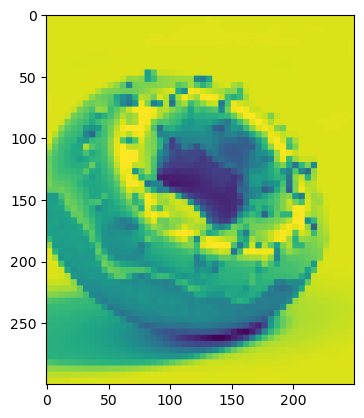

In [67]:
plt.imshow(Pooled_Y)

In [68]:
def rule(val) -> int:
    if(val<50): return 0
    if(val<100): return 50
    if(val<150): return 100
    if(val<200): return 150
    return 200

In [69]:
result = np.zeros((H,W))
for i in range(H):
    for j in range(W):
        result[i,j] = rule(Pooled_Y[i,j])

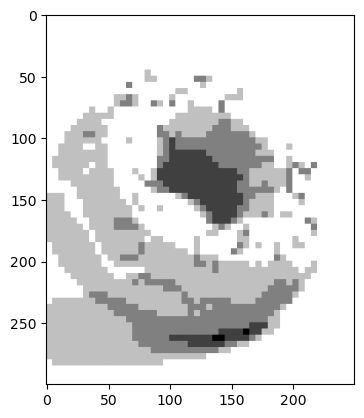

In [70]:
plt.imshow(result,cmap="gray")

In [71]:
def ruleASCII(val) -> chr:
#$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,"^`'.
    if(val<50): return '@'
    if(val<100): return '#'
    if(val<150): return '0'
    if(val<200): return ';'
    return '.'

result2 = [[] for i in range(H)]
for i in range(H):
    for j in range(W):
        result2[i].append(ruleASCII(Pooled_Y[i,j]))

In [73]:
file_path = "result.txt"

with open(file_path, "w") as f:
    for row in result2:
        row_str = "".join(row)
        f.write(row_str + "\n")

TypeError: Image data of dtype <U21 cannot be converted to float

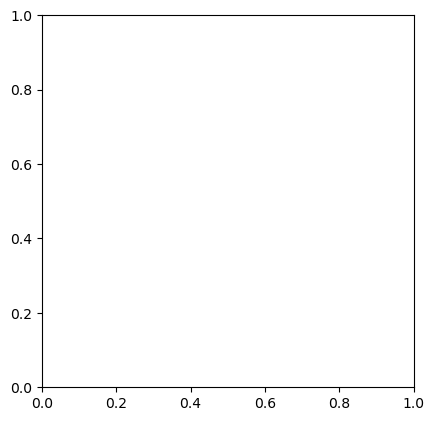

In [76]:
my_matrix = np.array([["a", 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

# Define the font properties
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Plot the transposed matrix with specified font
plt.matshow(my_matrix)
plt.title('Transposed Matrix', fontdict=font)
plt.show()

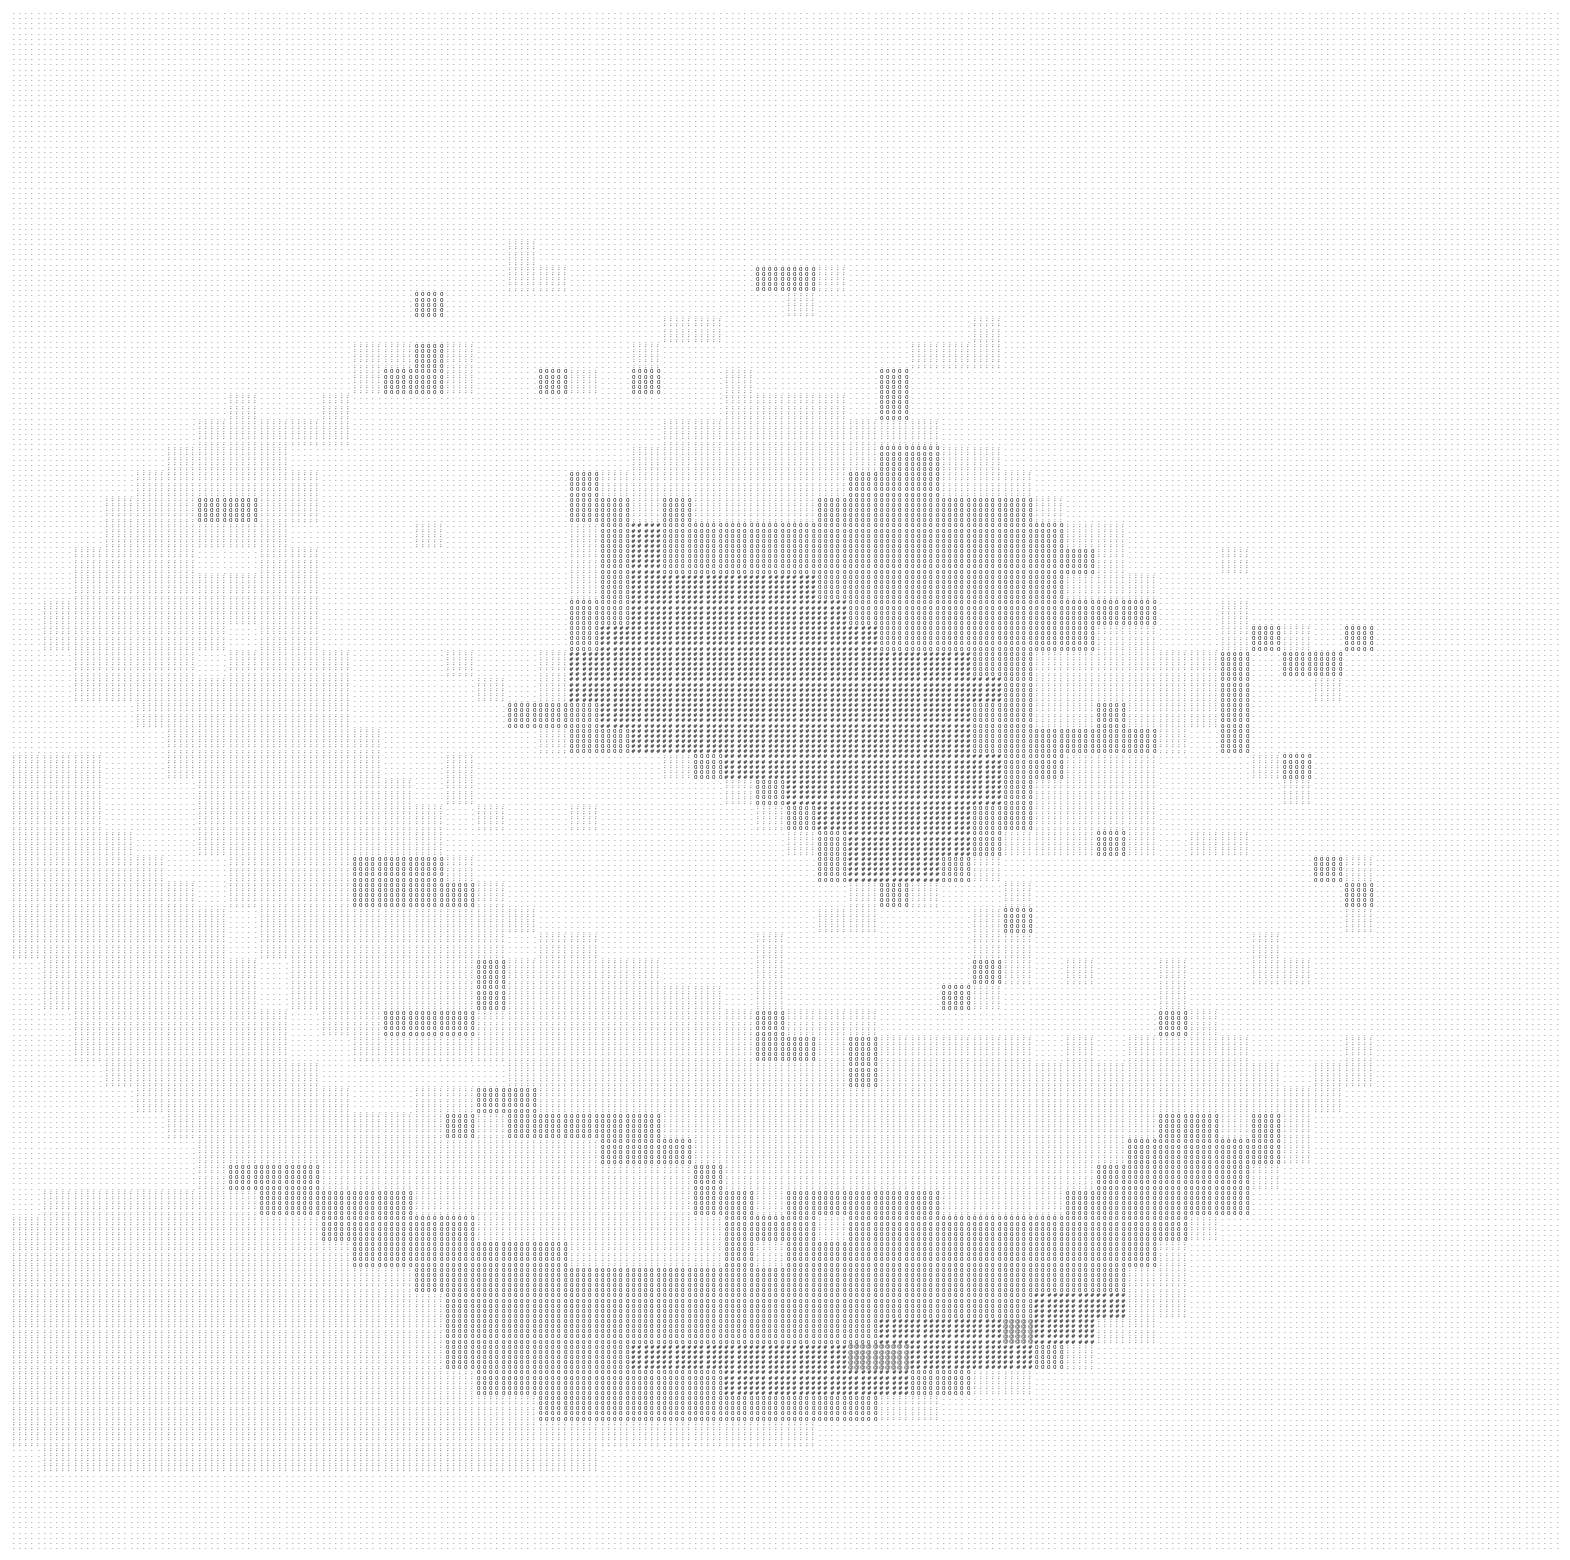

In [83]:

plt.figure(figsize=(20, 20))
for i in range(len(result2)):
    for j in range(len(result2[0])):
        plt.text(j, -i, result2[i][j], ha='center', va='center', fontsize=4)

# Adjust plot settings
plt.xlim(-0.5, len(result2[0]) - 0.5)
plt.ylim(-len(result2) + 0.5, 0.5)
plt.axis('off')
plt.show()